In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder

In [29]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.layers import LSTM

2024-04-11 10:33:33.360624: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-11 10:33:33.428025: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 10:33:34.223557: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 514.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 74.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 60.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 91.3 

In [4]:
data_frame_1=pd.read_csv("/home/onyxia/work/NLP_3A_ENSAE/data_bases/firstname_with_sex.csv",sep=";")
data_frame_2=pd.read_csv("/home/onyxia/work/NLP_3A_ENSAE/data_bases/transcriptions_with_sex.csv",sep=",")

In [5]:
data_frame_2_cleaned=data_frame_2[['sex']].copy()

In [6]:

data_frame_2['prediction'] = data_frame_2['prediction'].astype(str)

# Créez une nouvelle liste pour stocker les prénoms
first_names = []
surname_list = []
# Parcourez chaque observation dans la colonne 'prediction'
for prediction in data_frame_2['prediction']:
   
    first_name = prediction.split()[3]
    surname = prediction.split()[1]
    # Ajoutez le prénom à la liste
    first_names.append(first_name)
    surname_list.append(surname)


# Ajoutez la liste des prénoms comme une nouvelle colonne dans le dataframe
data_frame_2_cleaned['first_name'] = first_names
data_frame_2_cleaned['surname'] = surname_list

In [7]:
data_frame_2_cleaned = data_frame_2_cleaned[data_frame_2_cleaned['sex'] != 'ambigu']

In [8]:
data_frame_2_cleaned.head()

,sex,first_name,surname
0,femme,Marie,Chardon
1,homme,Louis,Lhopital
2,femme,Marie,Pyrin
3,femme,Marie,Lavocat
4,femme,Marguerite,Benne


([<matplotlib.axis.XTick at 0x7f89f0654ad0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

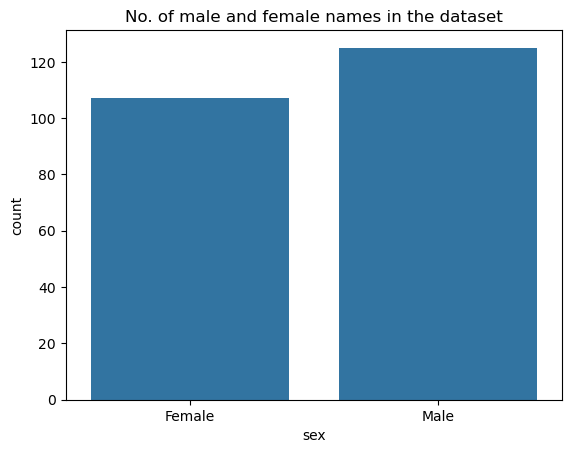

In [53]:
sns.countplot(x='sex',data =data_frame_2_cleaned )
plt.title('No. of male and female names in the dataset')
plt.xticks([0,1],('Female','Male'))

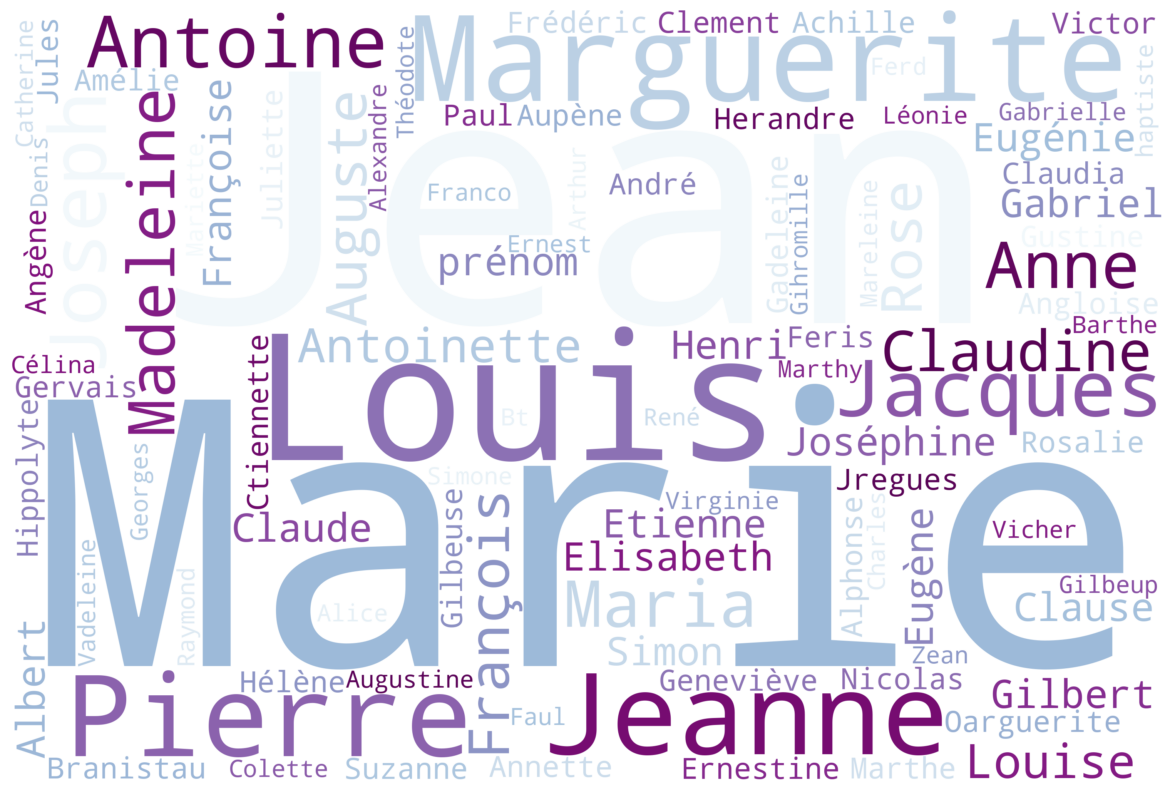

In [10]:

# Joining first names into a single string
text = " ".join(i for i in data_frame_2_cleaned.first_name)

# Creating WordCloud with Arial font
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="white",
    colormap="BuPu",
    collocations=False,  # specify the path to the Arial font file on your system
).generate(text)

# Display the WordCloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
data_frame_2_cleaned['sex'] = data_frame_2_cleaned['sex'].replace({0:"homme",1:"femme"})


In [12]:
data_frame_2_cleaned.head()

,sex,first_name,surname
0,femme,Marie,Chardon
1,homme,Louis,Lhopital
2,femme,Marie,Pyrin
3,femme,Marie,Lavocat
4,femme,Marguerite,Benne


In [13]:
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',

            'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(data_frame_2_cleaned[data_frame_2_cleaned['first_name'].str.startswith(i)])

print(startletter_count)

{'A': 28, 'B': 3, 'C': 14, 'D': 1, 'E': 10, 'F': 10, 'G': 13, 'H': 5, 'I': 0, 'J': 49, 'K': 0, 'L': 14, 'M': 47, 'N': 1, 'O': 1, 'P': 9, 'Q': 0, 'R': 5, 'S': 4, 'T': 1, 'U': 0, 'V': 4, 'W': 0, 'X': 0, 'Y': 0, 'Z': 1}


Text(0.5, 1.0, 'Nombre de noms par première lettre')

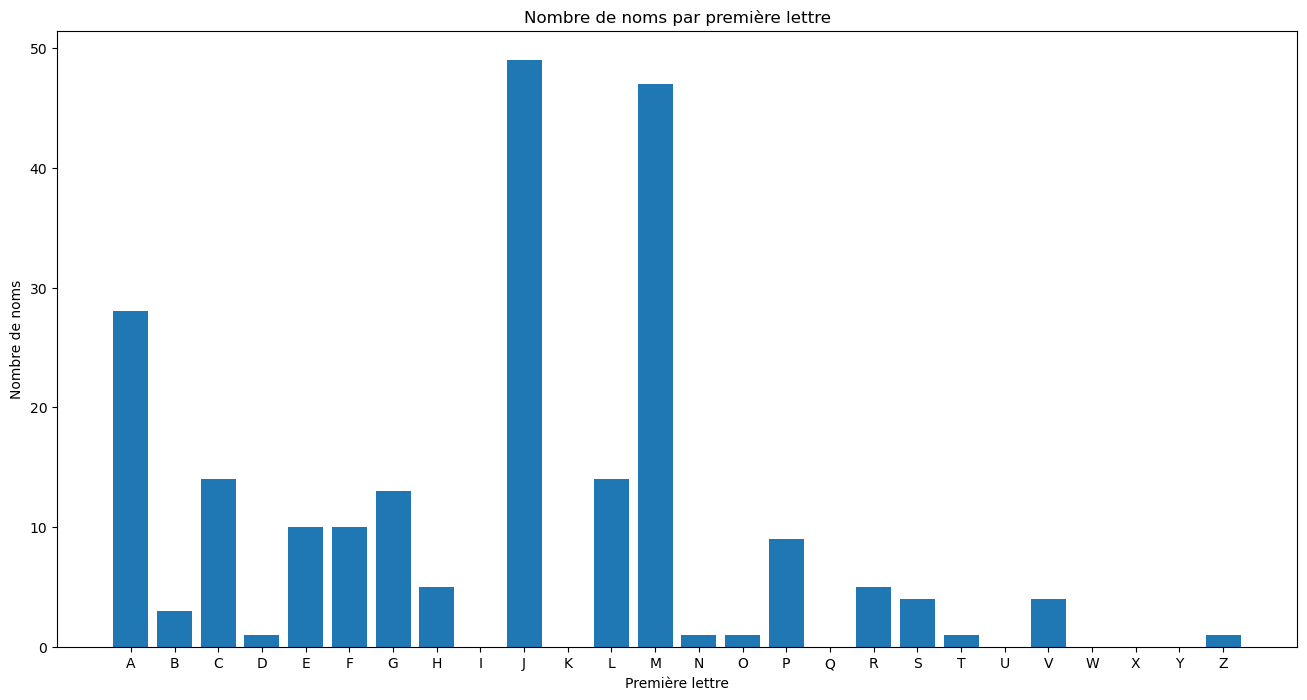

In [14]:
plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Première lettre')

plt.ylabel('Nombre de noms')

plt.title('Nombre de noms par première lettre')

In [15]:
X =list( data_frame_2_cleaned['first_name'])

Y = list(data_frame_2_cleaned['sex'])

In [16]:
encoder= LabelEncoder()

Y = encoder.fit_transform(Y)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='char')

X=cv.fit_transform(X).toarray()

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

LR_model= LogisticRegression()

LR_model.fit(x_train,y_train)

LR_y_pred = LR_model.predict(x_test)


In [21]:
from sklearn.naive_bayes import MultinomialNB

NB_model= MultinomialNB()

NB_model.fit(x_train,y_train)

NB_y_pred = NB_model.predict(x_test)


In [22]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(use_label_encoder= False)

XGB_model.fit(x_train,y_train)

XGB_y_pred = XGB_model.predict(x_test)

In [23]:
# function for confusion matrix

from sklearn.metrics import confusion_matrix

def cmatrix(model):

    y_pred = model.predict(x_test)

    cmatrix = confusion_matrix(y_test, y_pred)

    print(cmatrix)

    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

    plt.xlabel('Predicted Values')

    plt.ylabel('Actual Values')

    plt.title('Confusion Matrix')


0.8181818181818182
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        34
           1       0.82      0.86      0.84        43

    accuracy                           0.82        77
   macro avg       0.82      0.81      0.81        77
weighted avg       0.82      0.82      0.82        77

[[26  8]
 [ 6 37]]
None


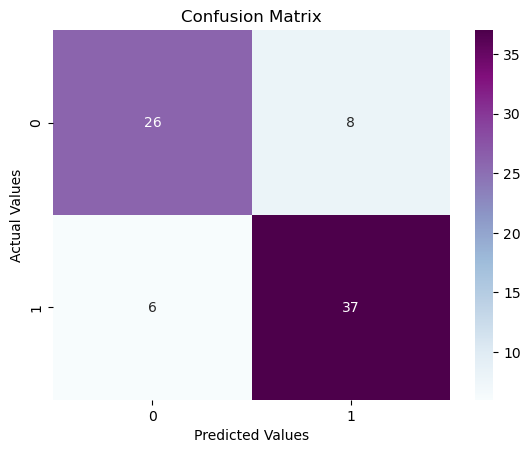

In [24]:
import sklearn.metrics as metrics

#for logistic regression

print(metrics.accuracy_score(LR_y_pred,y_test))

print(metrics.classification_report(y_test, LR_y_pred))

print(cmatrix(LR_model))


0.7142857142857143
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        34
           1       0.72      0.79      0.76        43

    accuracy                           0.71        77
   macro avg       0.71      0.70      0.71        77
weighted avg       0.71      0.71      0.71        77

[[21 13]
 [ 9 34]]
None


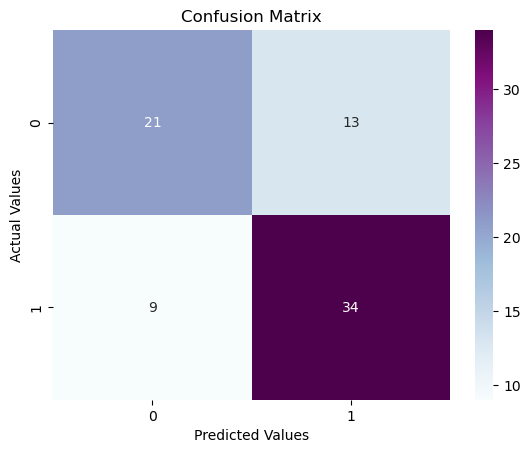

In [25]:
# for naive bayes

print(metrics.accuracy_score(NB_y_pred,y_test))

print(metrics.classification_report(y_test, NB_y_pred))

print(cmatrix(NB_model))

0.8961038961038961
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        34
           1       0.89      0.93      0.91        43

    accuracy                           0.90        77
   macro avg       0.90      0.89      0.89        77
weighted avg       0.90      0.90      0.90        77

[[29  5]
 [ 3 40]]
None


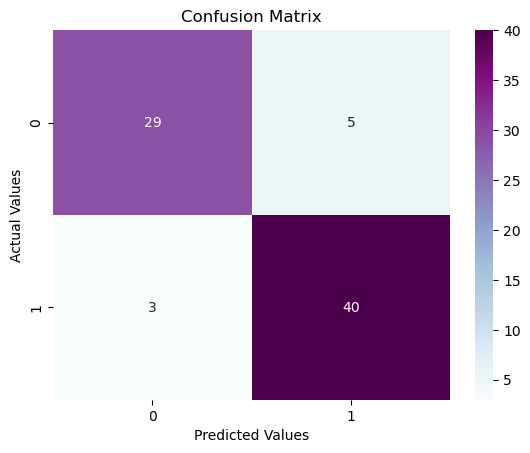

In [26]:
# for XGBoost
print(metrics.accuracy_score(XGB_y_pred,y_test))

print(metrics.classification_report(y_test, XGB_y_pred))

print(cmatrix(XGB_model))